<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli and Rajath Kumar Mysore Pradeep Kumar</td>
</table>

Note:  This material largely follows the text "Numerical Linear Algebra" by Trefethen and Bau (SIAM, 1997) and is meant as a guide and supplement to the material presented there.

In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

## Singular Value Decomposition

Definition: Let $A \in \mathbb R^{m \times n}$, then $A$ can be factored as
$$
    A = U\Sigma V^{T}
$$

where,
* $U \in \mathbb R^{m \times m}$ and is the orthogonal matrix whose columns are the eigenvectors of $AA^{T}$
* $V \in \mathbb R^{n \times n}$ and is the orthogonal matrix whose columns are the eigenvectors of $A^{T}A$
* $\Sigma \in \mathbb R^{m \times n}$ and is a diagonal matrix with elements $\sigma_{1}, \sigma_{2}, \sigma_{3}, ... \sigma_{r}$ where $r = rank(A)$ corresponding to the square roots of the eigenvalues of $A^{T}A$. They are called the singular values of $A$ and are non negative arranged in descending order. ($\sigma_{1} \geq \sigma_{2} \geq \sigma_{3} \geq ... \sigma_{r} \geq 0$).

The SVD has a number of applications mostly related to reducing the dimensionality of a matrix.

### Full SVD example

Consider the matrix
$$
    A = \begin{bmatrix} 
        2 & 0 & 3 \\
        5 & 7 & 1 \\
        0 & 6 & 2 
    \end{bmatrix}.
$$
Confirm the SVD representation using `numpy` functions as appropriate.

In [12]:
A = numpy.array([
    [2,0,3],
    [5,7,1],
    [0,6,2]
])
U = numpy.linalg.eig(numpy.dot(A, A.T))[1]
eig_values, V = numpy.linalg.eig(numpy.dot(A.T, A))
print(numpy.dot(U, numpy.dot(numpy.diag(numpy.sqrt(eig_values)), V.T)))

[[  2.00000000e+00   8.80925004e-16   3.00000000e+00]
 [  5.00000000e+00   7.00000000e+00   1.00000000e+00]
 [  5.21804822e-15   6.00000000e+00   2.00000000e+00]]


### Eigenvalue Decomposition vs. SVD Decomposition

Let the matrix $X$ contain the eigenvectors of $A$ which are linearly independent, then we can write a decomposition of the matrix $A$ as
$$
    A = X \Lambda X^{-1}.
$$

How does this differ from the SVD?
 - The basis of the SVD representation differs from the eigenvalue decomposition
   - The basis vectors are not in general orthogonal for the eigenvalue decomposition where it is for the SVD
   - The SVD effectively contains two basis sets.
 - All matrices have an SVD decomposition whereas not all have eigenvalue decompositions.

### Existence and Uniqueness

Every matrix $A \in \mathbb{C}^{m \times n}$ has a singular value decomposition. Furthermore, the singular values $\{\sigma_{j}\}$ are uniquely determined, and if $A$ is square and the $\sigma_{j}$ are distinct, the left and right singular vectors $\{u_{j}\}$ and $\{v_{j}\}$ are uniquely determined up to complex signs (i.e., complex scalar factors of absolute value 1).

### Matrix Properties via the SVD

 - The $\text{rank}(A) = r$ where $r$ is the number of non-zero singular values.
 - The $\text{range}(A) = [u_1, ... , u_r]$ and $\text{null}(a) = [v_{r+1}, ... , v_n]$.
 - The $|| A ||_2 = \sigma_1$ and $||A||_F = \sqrt{\sigma_{1}^{2}+\sigma_{2}^{2}+...+\sigma_{r}^{2}}$.
 - The nonzero singular values of A are the square roots of the nonzero eigenvalues of $A^{T}A$ or $AA^{T}$.
 - If $A = A^{T}$, then the singular values of $A$ are the absolute values of the eigenvalues of $A$.
 - For $A \in \mathbb{C}^{m \times n}$ then $|det(A)| = \Pi_{i=1}^{m} \sigma_{i}$

### Low-Rank Approximations

 - $A$ is the sum of the $r$ rank-one matrices:
$$
    A = \sum_{j=1}^{r} \sigma_{j}u_{j}v_{j}^{T}
$$
 - For any $v$ with $0 \leq v \leq r$, define
$$
    A = \sum_{j=1}^{v} \sigma_{j}u_{j}v_{j}^{T}
$$
Let $v = p = min(m,n)$, define $\sigma_{v+1} = 0,$ then

$$
    ||A - A_{v}||_{2} = \text{inf}_{B \in \mathbb{C}^{m \times n}} \text{rank}(B)\leq v|| A-B||_{2} = \sigma_{v+1}
$$
 - For any $v$ with $0 \leq v \leq r$, the matrix $A_{v}$ also satisfies
$$
    ||A - A_{v}||_{F} = \text{inf}_{B \in \mathbb{C}^{m \times n}} \text{rank}(B)\leq v ||A-B||_{F} = \sqrt{\sigma_{v+1}^{2} + ... + \sigma_{r}^{2}}
$$

#### Example

"Hello World"

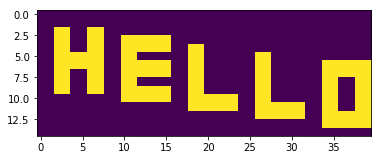

In [44]:
data = numpy.zeros((15,40))

#H
data[2:10,2:4] = 1
data[5:7,4:6] = 1
data[2:10,6:8] = 1

#E
data[3:11,10:12] = 1
data[3:5,12:16] = 1
data[6:8, 12:16] = 1
data[9:11, 12:16] = 1

#L
data[4:12,18:20] = 1
data[10:12,20:24] = 1

#L
data[5:13,26:28] = 1
data[11:13,28:32] = 1

#0
data[6:14,34:36] = 1
data[6:8, 36:38] = 1
data[12:14, 36:38] = 1
data[6:14,38:40] = 1

plt.imshow(data)
plt.show()

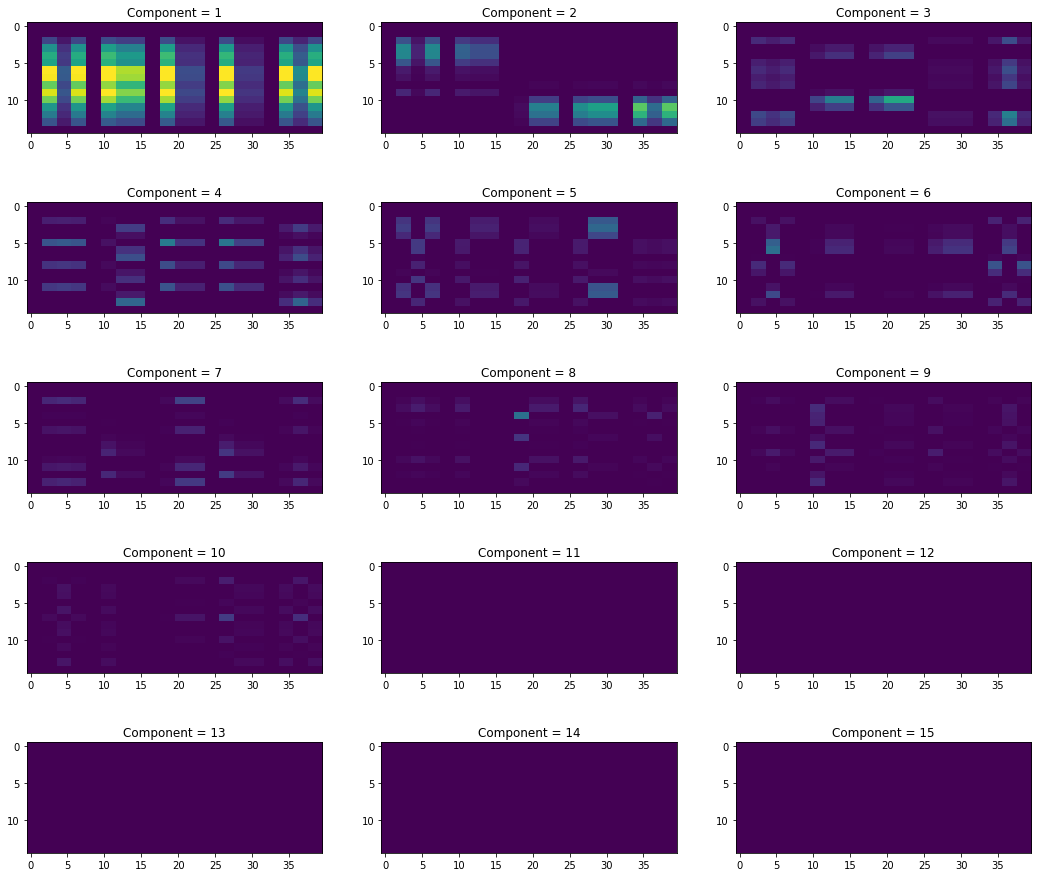

In [45]:
u, diag, vt = numpy.linalg.svd(data, full_matrices=True)
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 4)
for i in range(1, 16):
    diag_matrix = numpy.concatenate((numpy.zeros((len(diag[:i]) -1),), diag[i-1: i], numpy.zeros((40-i),)))
    reconstruct = numpy.dot(numpy.dot(u, numpy.diag(diag_matrix)[:15,]), vt)
    
    axes = fig.add_subplot(5, 3, i)
    mappable = axes.imshow(reconstruct, vmin=0.0, vmax=1.0)
    axes.set_title('Component = %s' % i)
    
plt.show()

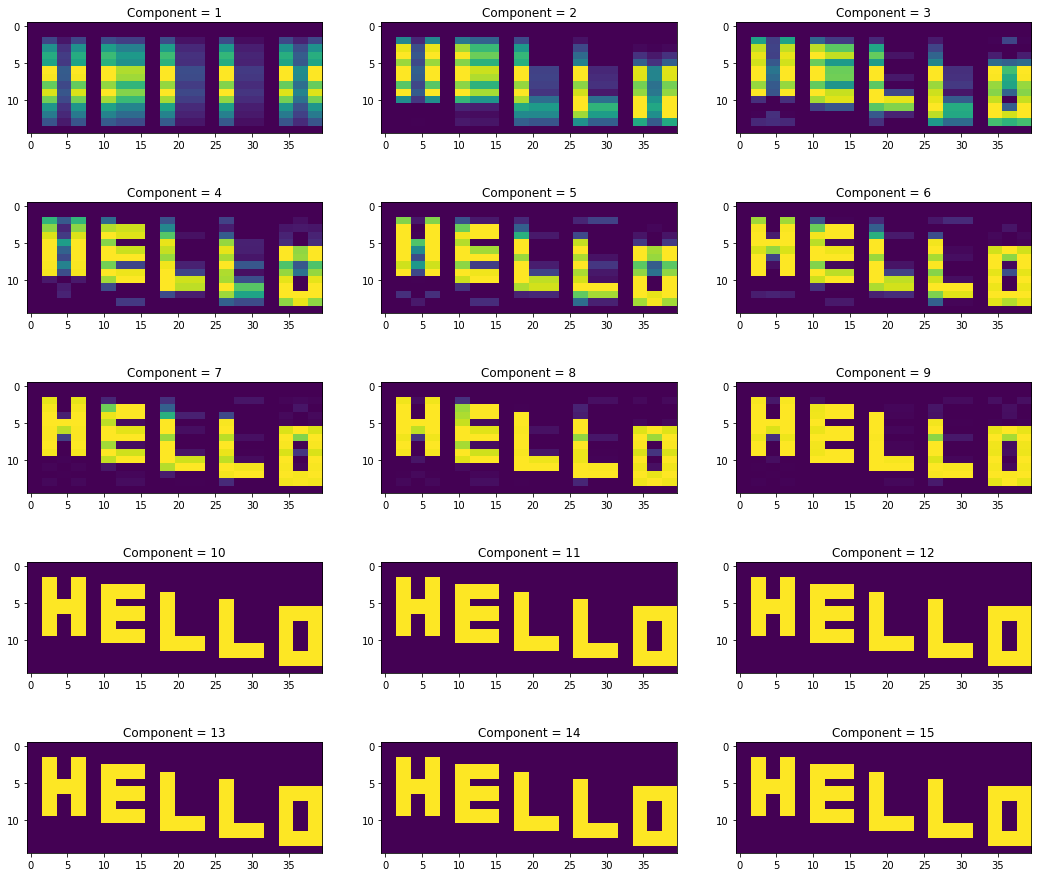

In [46]:
u, diag, vt = numpy.linalg.svd(data, full_matrices=True)
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 4)
for i in range(1, 16):
    diag_matrix = numpy.concatenate((diag[:i], numpy.zeros((40-i),)))
    reconstruct = numpy.dot(numpy.dot(u, numpy.diag(diag_matrix)[:15,]), vt)

    axes = fig.add_subplot(5, 3, i)
    mappable = axes.imshow(reconstruct, vmin=0.0, vmax=1.0)
    axes.set_title('Component = %s' % i)
    
plt.show()